In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from datasets import load_dataset

# Load dataset dari Hugging Face
ds = load_dataset("Censius-AI/ECommerce-Women-Clothing-Reviews")

# Ambil data bagian 'train' (karena dataset ini tidak memiliki split test)
df = ds["train"].to_pandas()

# Ambil kolom yang diperlukan
df = df[["Positive Feedback Count", "Recommended IND", "Rating"]]
 
# Pisahkan fitur dan label
X = df[["Positive Feedback Count", "Recommended IND"]]
y = df["Rating"].apply(lambda x: 1 if x >= 4 else 0)

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Latih model
model = GaussianNB()
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Confusion Matrix:
 [[1212  407]
 [  68 5359]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.75      0.84      1619
           1       0.93      0.99      0.96      5427

    accuracy                           0.93      7046
   macro avg       0.94      0.87      0.90      7046
weighted avg       0.93      0.93      0.93      7046



Confusion Matrix:
 [[1212  407]
 [  68 5359]]


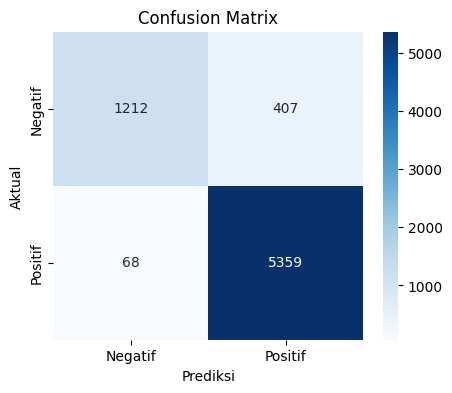

In [2]:
# Tambahan: Confusion Matrix (angka)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Tambahan: Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()